<a href="https://colab.research.google.com/github/RETAM-ROY/PlantVillage-Dataset/blob/master/fastpyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import zipfile
local_zip = '/content/drive/My Drive/color.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [0]:
path_img = Path('/content/color')
path_img.ls()

[PosixPath('/content/color/Apple___Black_rot'),
 PosixPath('/content/color/Apple___Apple_scab'),
 PosixPath('/content/color/Grape___Esca_(Black_Measles)'),
 PosixPath('/content/color/Orange___Haunglongbing_(Citrus_greening)'),
 PosixPath('/content/color/Peach___healthy'),
 PosixPath('/content/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'),
 PosixPath('/content/color/Tomato___Bacterial_spot'),
 PosixPath('/content/color/Tomato___Late_blight'),
 PosixPath('/content/color/Cherry_(including_sour)___healthy'),
 PosixPath('/content/color/Tomato___Tomato_mosaic_virus'),
 PosixPath('/content/color/Corn_(maize)___Common_rust_'),
 PosixPath('/content/color/Potato___Early_blight'),
 PosixPath('/content/color/Potato___Late_blight'),
 PosixPath('/content/color/Pepper,_bell___healthy'),
 PosixPath('/content/color/Squash___Powdery_mildew'),
 PosixPath('/content/color/Soybean___healthy'),
 PosixPath('/content/color/Tomato___Target_Spot'),
 PosixPath('/content/color/Corn_(maize)___healthy')

In [0]:
np.random.seed(2)

In [0]:
data = ImageDataBunch.from_folder(path_img, train = 'train' , valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs = 4).normalize(imagenet_stats)

In [0]:
data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

NameError: ignored

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.979845,0.296584,0.090323,13:14
1,0.711746,0.192117,0.059571,13:55
2,0.547394,0.141444,0.045576,13:52
3,0.596881,0.110525,0.032133,14:12
4,0.518088,0.180930,0.030936,14:07
5,0.397777,0.112792,0.028911,14:10
6,0.305830,0.059012,0.017954,13:35
7,0.290251,0.061463,0.017125,13:09
8,0.272817,0.048890,0.015192,13:07
9,0.169670,0.051055,0.015284,13:01


In [0]:
learn.save('spm_dataset_38_classes_freezed_10_epochs')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

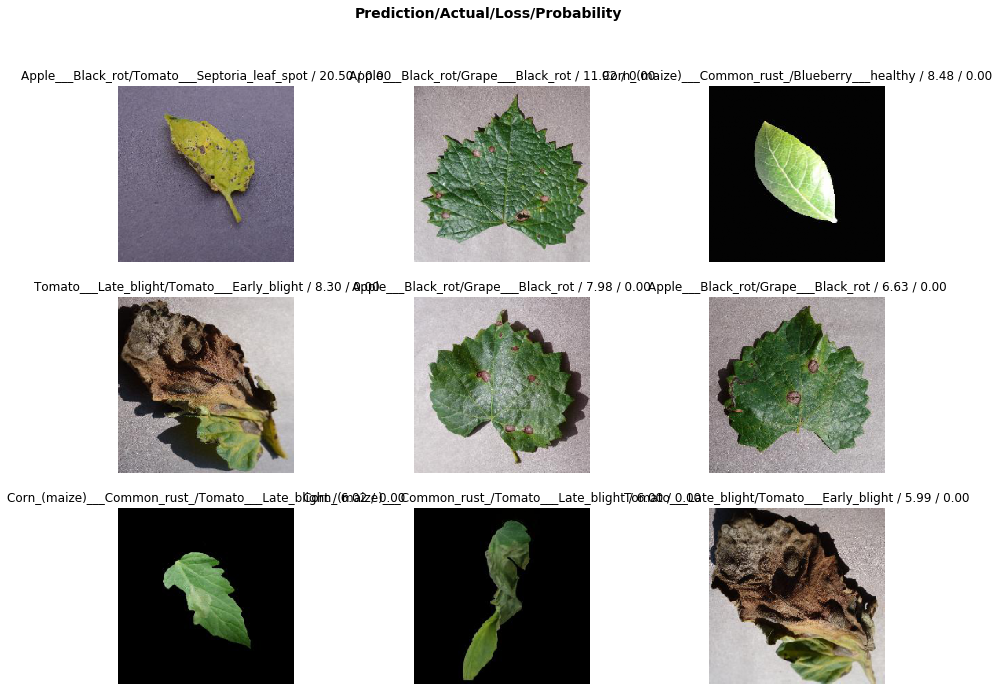

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

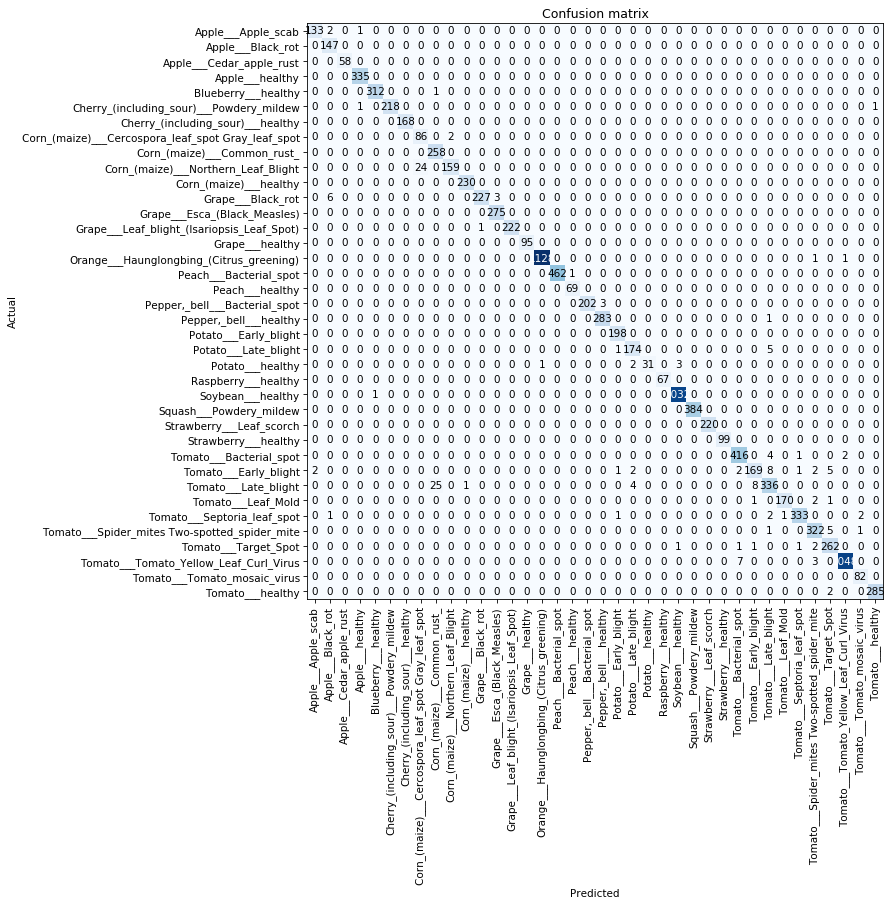

In [0]:
interp.plot_confusion_matrix(figsize = (12,12),dpi = 75)

In [0]:
interp.most_confused(min_val=2)

[('Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 25),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  24),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 8),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 8),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 7),
 ('Grape___Black_rot', 'Apple___Black_rot', 6),
 ('Potato___Late_blight', 'Tomato___Late_blight', 5),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 5),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 5),
 ('Tomato___Bacterial_spot', 'Tomato___Late_blight', 4),
 ('Tomato___Late_blight', 'Potato___Late_blight', 4),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 3),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 3),
 ('Potato___healthy', 'Soybean___healthy', 3),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  3),
 ('Apple___Apple_scab', 'Apple

In [0]:
learn.load('spm_dataset_38_classes_freezed_10_epochs')

NameError: ignored

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


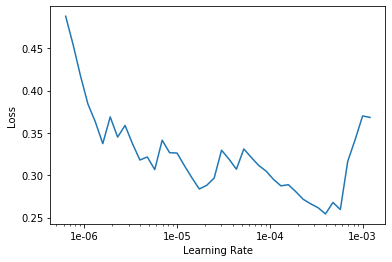

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

NameError: ignored

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,5.5e-4))

NameError: ignored

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,5.5e-4))